In [740]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [742]:

num_samples = 500

mean1 = 55
std_dev1 = 10
column1_numbers = np.random.normal(mean1, std_dev1, num_samples)
column1_numbers = np.clip(column1_numbers, 30, 120)
column1_numbers = np.round(column1_numbers).astype(int)


mean2 = 18
std_dev2 = 3
column2_numbers = np.random.normal(mean2, std_dev2, num_samples)
column2_numbers = np.clip(column2_numbers, 12, 26)
column2_numbers = np.round(column2_numbers).astype(int)


column3_numbers = np.random.randint(2, size=num_samples)
column3_numbers[column1_numbers > mean1] = 1  # تصنيف بناءً على الشرط


data = {
    'Miles_Per_week': column1_numbers,
    'Farthest_run': column2_numbers,
    'Qualified_Boston_Marathon': column3_numbers
}

df = pd.DataFrame(data)


In [744]:
df.head()

,Miles_Per_week,Farthest_run,Qualified_Boston_Marathon
0,55,12,1
1,42,19,0
2,66,19,1
3,47,13,1
4,47,15,0


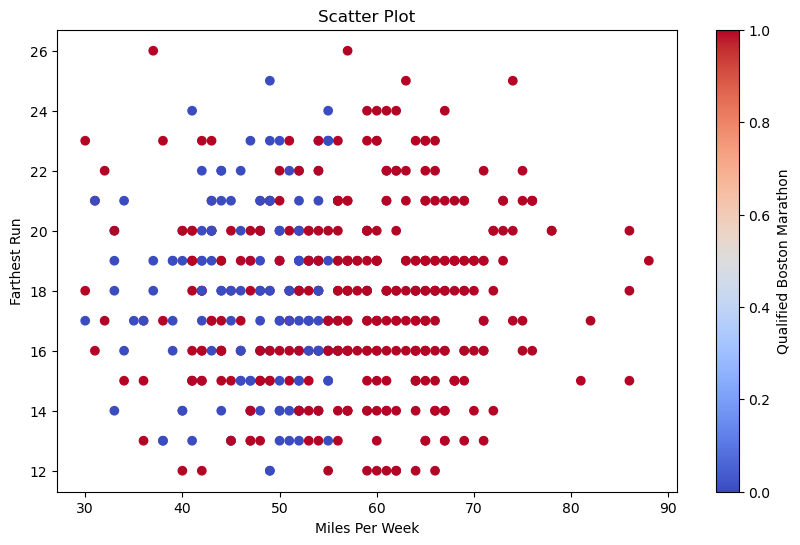

In [746]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Miles_Per_week'], df['Farthest_run'], c=df['Qualified_Boston_Marathon'], cmap='coolwarm')
plt.xlabel('Miles Per Week')
plt.ylabel('Farthest Run')
plt.title('Scatter Plot')
plt.colorbar(label='Qualified Boston Marathon')
plt.show()


In [748]:
X=df.iloc[:,0:2]

In [750]:
X

,Miles_Per_week,Farthest_run
0,55,12
1,42,19
2,66,19
3,47,13
4,47,15
...,...,...
495,61,21
496,57,19
497,33,20
498,59,20


In [752]:
y=df.iloc[:,2]

In [754]:
y

0      1
1      0
2      1
3      1
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: Qualified_Boston_Marathon, Length: 500, dtype: int32

In [756]:
from sklearn.model_selection import train_test_split

In [758]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [760]:
from sklearn.svm import SVC

In [762]:
Model=SVC()

In [764]:
Model.fit(X_test,y_test)

SVC()

In [766]:
Model.score(X_test,y_test)

0.76

In [768]:
#  بس يا عم كده الكود خلص بس يجى بقا اهم جزء و هو ازى ارع الدقه هنستعمل 3 حجات و هم  
# 1\Kernel  ودى افضلهم 
#2\gamma  كويس بردوا 
#3\regularization    
# \  بس فى الكود الاساسيى انا هستعمل ال Kernle and gamma  علشان دول افضل اتنين  


In [770]:
#1\regularization 

In [772]:
Model_reg0=SVC(C=0.1) 

In [774]:
Model_reg0.fit(X_train,y_train)

SVC(C=0.1)

In [776]:
Model_reg0.score(X_test,y_test)

0.76

In [778]:
Model_reg1=SVC(C=1) 
Model_reg1.fit(X_train,y_train)
Model_reg1.score(X_test,y_test)

0.71

In [780]:
Model_reg2=SVC(C=1000) 
Model_reg2.fit(X_train,y_train)
Model_reg2.score(X_test,y_test)

0.69

In [782]:
#2\gamma  كويس بردوا  

In [784]:
Model_gam=SVC(gamma=1) 
Model_gam.fit(X_train,y_train)
Model_gam.score(X_test,y_test)

0.81

In [786]:
Model_gam1=SVC(gamma=0.1) 
Model_gam1.fit(X_train,y_train)
Model_gam1.score(X_test,y_test)

0.75

In [788]:
Model_gam2=SVC(gamma=1000) 
Model_gam2.fit(X_train,y_train)
Model_gam2.score(X_test,y_test)

0.78

In [790]:
#3\Kernel  ودى افضلهم

In [792]:
Model_linear=SVC(kernel='linear') 
Model_linear.fit(X_train,y_train)
Model_linear.score(X_test,y_test)

0.73

In [794]:
Model_linear=SVC(kernel='rbf') 
Model_linear.fit(X_train,y_train)
Model_linear.score(X_test,y_test)

0.71